# Lab 6.4: Regression Diagnostics

**Question 1**

Using the data in https://s3-us-west-2.amazonaws.com/dsci/6002/data/homer.csv :

#### 1
1) Run a multiple regression model of $y$ against all the $x$ variables and then produce the residuals and fitted values. Create the residual diagnostic plot of residuals on the Y axis against the fitted values on the X axis. 

In [1]:
%pylab inline

import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import yaml

from sqlalchemy import create_engine
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import het_breushpagan
from statsmodels.graphics.correlation import plot_corr
from statsmodels.graphics.regressionplots import plot_leverage_resid2

pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']

engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds))

Populating the interactive namespace from numpy and matplotlib


In [2]:
homer = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/homer.csv')
homer.head()

,y,x1,x2,x3,x4,x5,x6
0,-2.17360,-0.023816,-0.012885,0.045936,-0.182890,0.028694,-0.81119
1,-1.29570,0.018453,0.058999,-0.072399,0.008679,-0.084344,-0.24208
2,0.14539,0.054999,0.131770,-0.067223,0.202430,0.127060,0.63388
3,0.92959,-0.018933,-0.010875,-0.028255,0.017912,0.084330,0.66062
4,0.90259,-0.000877,0.066941,-0.048190,0.064742,0.147880,0.26643


In [3]:
homer.describe()

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,y,x1,x2,x3,x4,x5,x6
count,6054.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000
mean,-0.008547,0.000079,-0.000007,-0.000049,0.000068,-0.000027,-0.001662
std,1.202365,0.039200,0.080779,0.058512,0.156589,0.119576,0.784465
min,-3.810000,-1.000000,-0.303830,-0.199880,-0.633240,-0.479130,-2.903200
25%,NaN,-0.021888,-0.054068,-0.039083,-0.109580,-0.081445,-0.535640
50%,NaN,-0.000125,0.000111,0.000156,-0.000083,-0.000788,-0.018469
75%,NaN,0.022555,0.055193,0.038948,0.107030,0.079695,0.514390
max,4.035900,1.170000,0.292970,0.199290,0.533080,0.454490,3.619300


In [4]:
# We have missing data on variable y:
homer = homer.dropna()

In [5]:
homer.describe()

,y,x1,x2,x3,x4,x5,x6
count,6054.000000,6054.000000,6054.000000,6054.000000,6054.000000,6054.000000,6054.000000
mean,-0.008547,-0.000027,0.000006,-0.000029,0.000056,0.000028,-0.001640
std,1.202365,0.033310,0.080791,0.058493,0.156617,0.119564,0.784653
min,-3.810000,-0.104170,-0.303830,-0.199880,-0.633240,-0.479130,-2.903200
25%,-0.879910,-0.021885,-0.054038,-0.039078,-0.109588,-0.081435,-0.535820
50%,-0.066951,-0.000128,0.000113,0.000168,-0.000134,-0.000773,-0.018369
75%,0.929407,0.022538,0.055230,0.038944,0.107017,0.079743,0.514525
max,4.035900,0.112820,0.292970,0.199290,0.533080,0.454490,3.619300


In [6]:
X = homer[['x1', 'x2', 'x3', 'x4', 'x5','x6']]
X = sm.add_constant(X)
y = homer['y']

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     452.1
Date:                Fri, 07 Oct 2016   Prob (F-statistic):               0.00
Time:                        16:51:53   Log-Likelihood:                -8583.7
No. Observations:                6054   AIC:                         1.718e+04
Df Residuals:                    6047   BIC:                         1.723e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0069      0.013     -0.534      0.593        -0.032     0.018
x1             4.0686      0.508      8.015      0.000         3.073     5.064
x2             1.1412      0.257      4.442      0.000         0.638     1.645
x3             4.0318      0.358     11.249      0.000         3.329     4.734
x4             0.9373      0.127      7.362      0.000         0.688     1.187
x5             3.9840      0.171     23.316      0.000         3.649     4.319
x6             0.9967      0.022     44.744      0.000         0.953     1.040
==============================================================================
Omnibus:                      635.831   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.770
Skew:                           0.070   Prob(JB):                     7.54e-41
Kurtosis:                       2.156   Cond. No.                         41.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

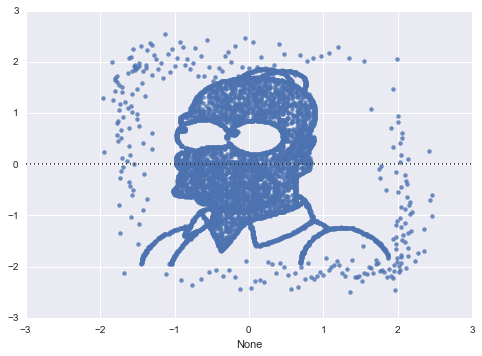

In [7]:
sns.residplot(results.fittedvalues, results.resid_pearson, homer);

#### 2
2) Is the linearity assumption met? 

No.

#### 3
3) Test for non-Normality.

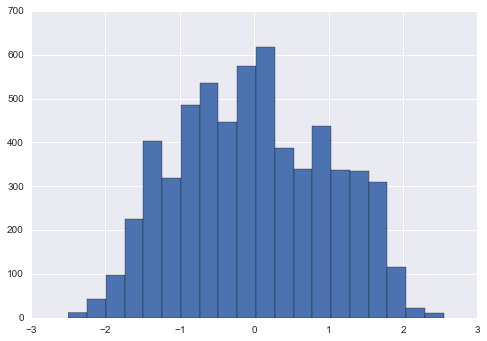

In [8]:
# Histogram of residuals.
res1 = results.resid
hist(res1, bins = 20);

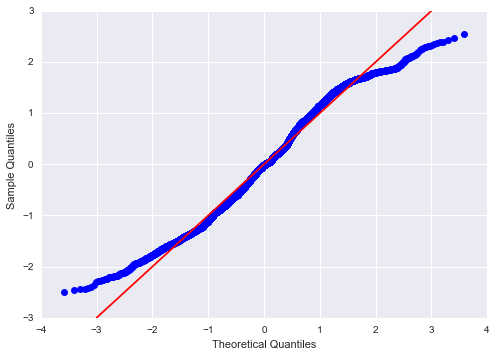

In [9]:
## QQ plot of residuals.
sres1 = results.resid_pearson
qqplot(sres1)
q = linspace(-3, 3)
plot(q, q, color='r');

We can visually see the lack of Normality.

Numerical method for normality. 

$H_0$ : data is Normally distributed.

$H_a$: data is not Normally distributed.

A small p-value indicates violation of the Normality assumption.

From the OLS model we get:

Jarque-Bera (JB): 184.770

Prob(JB): 7.54e-41

The p-value for the Normality test is 7.54e-41, which shows evidence of non-Normality.

#### 4

4) Test for heteroskedasticity. 

In [10]:
# Note that we are taking the abs value of y, since some values of y are negative and the log does not exist.
# We look for the mininum value of y first:
min_y = homer['y'].min()
# Then we add the absolute value of the above minimum value to all y to avoid log of negative number:
homer['y'] = homer['y'] + abs(min_y)

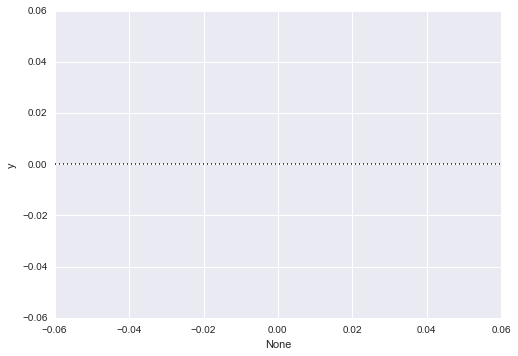

In [11]:
log_y = np.log(y)
model_log = sm.OLS(log_y, X)
results_log = model_log.fit()

sns.residplot(results_log.fittedvalues, log_y, homer);

Visually confirms heteroskedasticity. Lower values of $log(y)$ show bigger variance compared to higher values of $log(y)$.

**Question 2**

You are given data about the Scottish Hill Climb races in the table `hills` which consists of 4 columns:

```
Race:     The name of the race (PK)
Distance: The distance of the race in miles
Climb:    Elevation climbed during race in feet
Time:     Record time for race in minutes
```

In [12]:
hills = pd.read_sql("SELECT * FROM hills", engine)
hills.head()

,Race,Distance,Climb,Time
0,Greenmantle,2.5,650,16.083
1,Carnethy,6.0,2500,48.350
2,CraigDunain,6.0,900,33.650
3,BenRha,7.5,800,45.600
4,BenLomond,8.0,3070,62.267


In [13]:
hills.describe()

,Distance,Climb,Time
count,35.000000,35.000000,35.000000
mean,7.528571,1815.314286,57.875714
std,5.523936,1619.150536,50.040716
min,2.000000,300.000000,15.950000
25%,4.500000,725.000000,28.000000
50%,6.000000,1000.000000,39.750000
75%,8.000000,2200.000000,68.625000
max,28.000000,7500.000000,204.617000


#### 1
1) Explore the data with a scatter matrix and a correlation plot (`statsmodels.graphics.correlation.plot_corr`).  

   Build a multiple regression model to predict `Time` based on `Distance` and `Climb`.
   

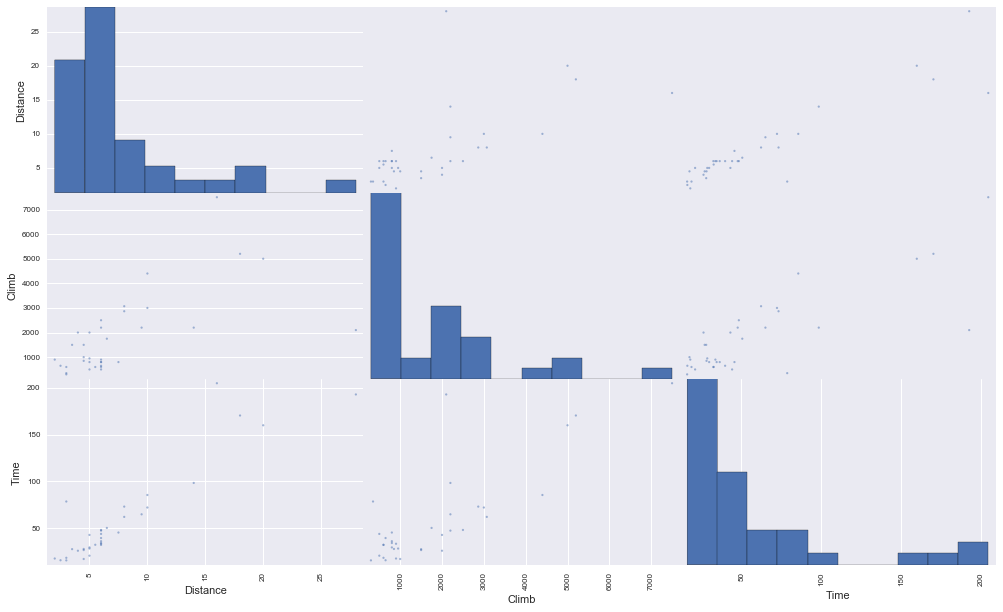

In [14]:
pd.scatter_matrix(hills, figsize=(17, 10), edgecolor='none', alpha=0.5);

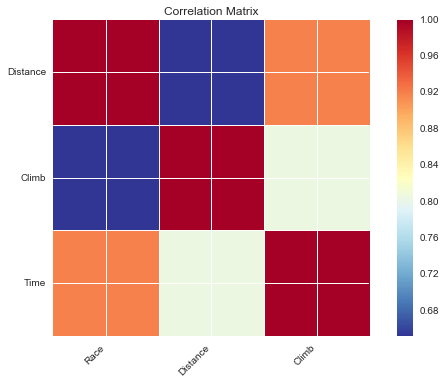

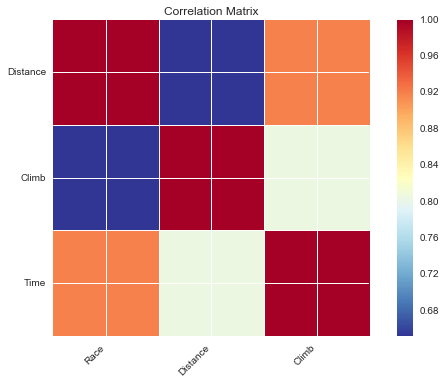

In [15]:
# We can use all variables since they are all numerical.
plot_corr(hills.corr(), xnames=hills.columns.tolist())

> IF NOT numerical, we would select only the numerical ones like:

> `numerics_only = hills.select_dtypes(['int64', 'float64'])`

> `plot_corr(numerics_only.corr(), xnames=numerics_only.columns.tolist())`

In [16]:
X = hills[['Distance', 'Climb']]
X = sm.add_constant(X)
y = hills['Time']

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     181.7
Date:                Fri, 07 Oct 2016   Prob (F-statistic):           3.40e-18
Time:                        16:51:58   Log-Likelihood:                -142.11
No. Observations:                  35   AIC:                             290.2
Df Residuals:                      32   BIC:                             294.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -8.9920      4.303     -2.090      0.045       -17.756    -0.228
Distance       6.2180      0.601     10.343      0.000         4.993     7.442
Climb          0.0110      0.002      5.387      0.000         0.007     0.015
==============================================================================
Omnibus:                       47.910   Durbin-Watson:                   2.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.976
Skew:                           3.026   Prob(JB):                     1.56e-51
Kurtosis:                      14.127   Cond. No.                     4.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 2
2) Interpret the coefficients of your model.  

For every unit of distance, time increases by 6.2180 units.

For every unit of climb, time increses by 0.0110 units.

#### 3
3) Plot the fitted values of the response (`Time`) against the standardized residuals of the model.

   **Hint:**
   - Use `model.fittedvalues` to get fitted values and `model.resid_pearson` to get the standardized residuals
 
   Does the residual plot appear to fulfill the following assumptions:
   - Linearity
   - Normality
   - Homoscedasticity 
   
   What are the consequences if those assumptions are not met ? 


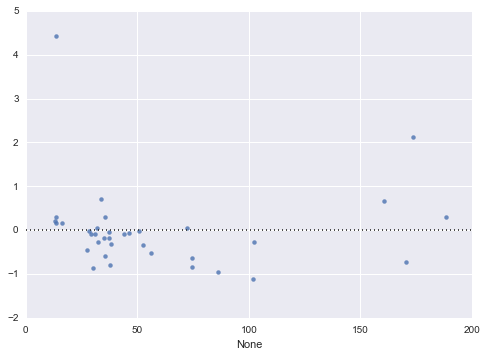

In [17]:
sns.residplot(results.fittedvalues, results.resid_pearson, hills);

No linearity. Looks like a parabola.

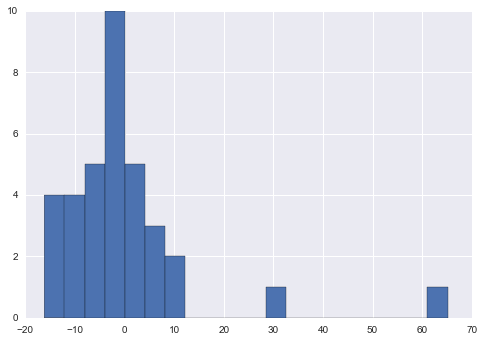

In [18]:
# Histogram of residuals.
res1 = results.resid
hist(res1, bins = 20);

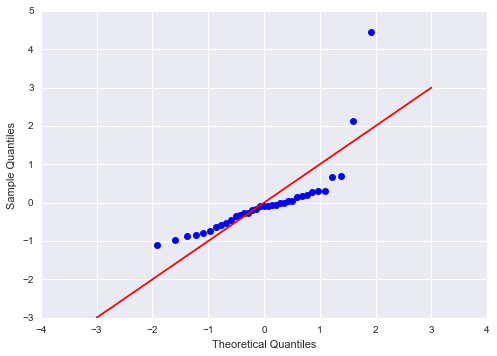

In [19]:
## QQ plot of residuals.
sres1 = results.resid_pearson
qqplot(sres1)
q = linspace(-3, 3)
plot(q, q, color='r');

We visually confirm non-Normality.

Numerical method for normality.

$H_0$  : data is Normally distributed.

$H_a$ : data is not Normally distributed.

A small p-value indicates violation of the Normality assumption.

From the OLS model we get:

Jarque-Bera (JB): 233.976

Prob(JB): 1.56e-51

The p-value for the Normality test is 1.56e-51, which shows evidence of non-Normality.

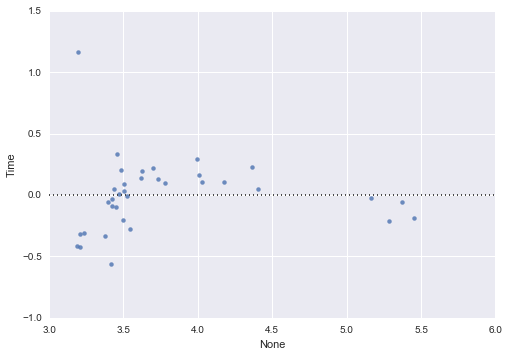

In [20]:
log_y = np.log(y)
model_log = sm.OLS(log_y, X)
results_log = model_log.fit()

sns.residplot(results_log.fittedvalues, log_y, hills);

Improved linearity. We visually confirm non homoscedasticity: the variance of small values of the fitted values is higher than the variance of the higher fitted values.

Numerical tests for heteroskedasticity (non homoscedasticity).  

$H_0$: constant variance  

$H_1$: non-constant variance  

A small p-value gives evidence for non-constant variance (heteroskedasticity).

In [21]:
het_breushpagan(results_log.resid, results_log.model.exog) # the second output gives the p-value of the test

(2.1357771585668122,
 0.34373351782945255,
 1.0398065611332974,
 0.36516164777824511)

The p-value for the heteroskedasticity test is 3.3820628319097236e-22, which shows evidence of heteroskedasticity.

#### 4

4) An additional test for Normality of the residuals is the Q-Q plot. If the quantiles of the residuals match that of a Normal distribution, then the residuals are normally distribution. 

   Import the qq-plot function from statsmodels `from statsmodels.graphics.gofplots import qqplot`.
   
   Draw a straight line where the quantiles of the residuals are the same as those of a standard Normal distribution.
   
   The plot you produce should look similar to the one below:
   
   ![](images/qq.png)
   
   Do the residuals appear to be Normal ?
  
   

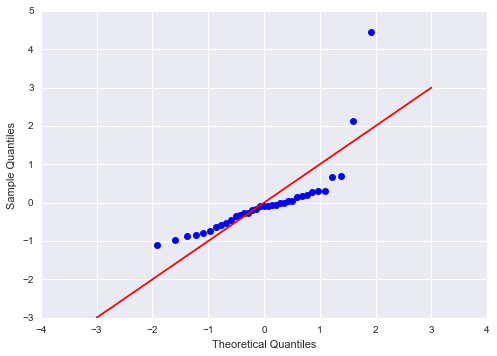

In [22]:
## QQ plot of residuals.
sres1 = results.resid_pearson
qqplot(sres1)
q = linspace(-3, 3)
plot(q, q, color='r');

They do not appear to be Normal.

#### 5
5) (Extra Credit) To identify outliers, one can also look at the leverage-residual plot. 

   Explain what leverage means and how is leverage computed. Is a data point influential if the residual is large but the leverage is low? What about if the residual and leverage are both high?
   
   Import the leverage-residual plot from statsmodels by `from statsmodels.graphics.regressionplots import plot_leverage_resid2`. You can call it by just feeding in the fitted model.
   
   ```python
   plot_leverage_resid2(model)
   ```
   
   Identify the races where the leverage and residual are high. Comment on the commonalities between those races.
   
   

Leverage is when we observe an unusual value of a variable and if included in a regression model, it may affect the slope of the model.

If the residual is large but the leverage is low, then the data point is not influential. However, if the residual and leverage are both high, then it's is influential.

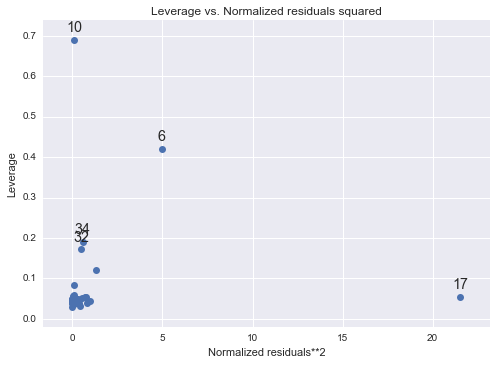

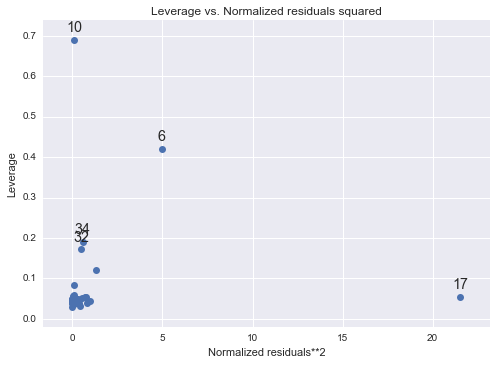

In [23]:
plot_leverage_resid2(results)

The races that should be excluded are: 6, 10 and 17.

#### 6
6) (Extra Credit) What are the precautions you need to bare in mind if you were to remove the outliers you have identified in `5.` ?
   
   Remove the outliers in the dataset and re-run the model. 
   
   Plot the residual plot and Q-Q plot as you have done previously. Comment on the plots.
   
   Also comment on the fit of the model to the data relative to the first model.

In [24]:
# Outliers are races with ID 10, 6 and 17.
hills_new = hills[(hills.index != 6) &  (hills.index != 10) & (hills.index != 17)]
hills_new.head(n=10)

,Race,Distance,Climb,Time
0,Greenmantle,2.5,650,16.083
1,Carnethy,6.0,2500,48.350
2,CraigDunain,6.0,900,33.650
3,BenRha,7.5,800,45.600
4,BenLomond,8.0,3070,62.267
5,Goatfell,8.0,2866,73.217
7,Cairnpapple,6.0,800,36.367
8,Scolty,5.0,800,29.750
9,Traprain,6.0,650,39.750
11,Dollar,5.0,2000,43.050


In [25]:
X = hills_new[['Distance', 'Climb']]
X = sm.add_constant(X)
y = hills_new['Time']

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     544.1
Date:                Fri, 07 Oct 2016   Prob (F-statistic):           1.02e-23
Time:                        16:52:00   Log-Likelihood:                -101.92
No. Observations:                  32   AIC:                             209.8
Df Residuals:                      29   BIC:                             214.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -10.7171      2.147     -4.992      0.000       -15.108    -6.326
Distance       6.8377      0.467     14.647      0.000         5.883     7.792
Climb          0.0077      0.001      5.374      0.000         0.005     0.011
==============================================================================
Omnibus:                        5.917   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                4.255
Skew:                           0.778   Prob(JB):                        0.119
Kurtosis:                       3.879   Cond. No.                     4.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model explain around 97% of the variation in y. Most importantly, the adjusted $R^2$ is better than the initial model (0.972). F-stats is better, and overall p-value even smaller.

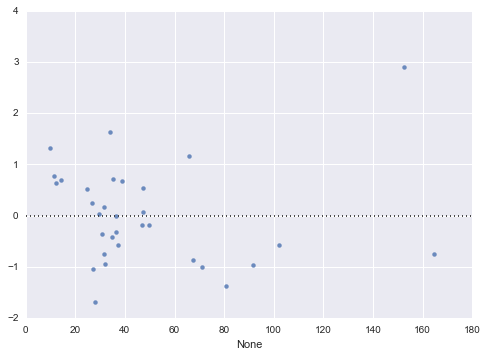

In [26]:
sns.residplot(results.fittedvalues, results.resid_pearson, hills_new);

Visually, the above plot shows linearity.

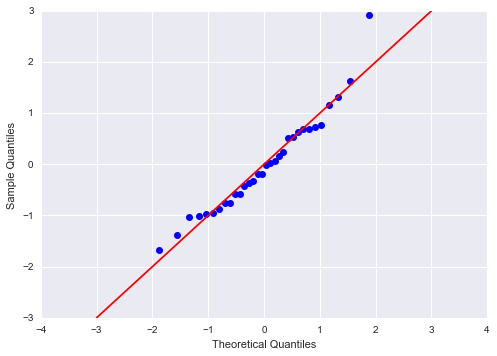

In [27]:
sres1 = results.resid_pearson
qqplot(sres1)
q = linspace(-3, 3)
plot(q, q, color='r');

QQ plot shows improved normality.

**Question 3**

You are given the price and features of some used cars in the tables `car_price` and `car_type`. Car company X want you to build a model to predict car price based on some given features about the car.

#### 1
1) Explore the dataset with a correlation matrix. You should select only numeric columns when you are constructing the correlation matrix.  
   ```python
   numerics_only = car_price.select_dtypes(['int64', 'float64'])
   sm.graphics.plot_corr(numerics_only.corr(), xnames=numerics_only.columns.tolist())
   ```

   Which 2 variables are strongly multicollinear with each other based on your observation of the correlation matrix ?
   
   Which one would you choose to put in the model and why (subjective answer).

In [28]:
car_price = pd.read_sql("SELECT * FROM car_price", engine)
car_price.head()

,car_id,price,mileage,make,model,trim,cruise,sound,leather
0,0,17314.103129,8221,Buick,Century,Sedan 4D,1,1,1
1,1,17542.036083,9135,Buick,Century,Sedan 4D,1,1,0
2,2,16218.847862,13196,Buick,Century,Sedan 4D,1,1,0
3,3,16336.913140,16342,Buick,Century,Sedan 4D,1,0,0
4,4,16339.170324,19832,Buick,Century,Sedan 4D,1,0,1


In [29]:
car_type = pd.read_sql("SELECT * FROM car_type", engine)
car_type.head()

,make,model,trim,type,cylinder,liter,doors
0,Buick,Century,Sedan 4D,Sedan,6,3.1,4
1,Buick,Lacrosse,CX Sedan 4D,Sedan,6,3.6,4
2,Buick,Lacrosse,CXL Sedan 4D,Sedan,6,3.6,4
3,Buick,Lacrosse,CXS Sedan 4D,Sedan,6,3.8,4
4,Buick,Lesabre,Custom Sedan 4D,Sedan,6,3.8,4


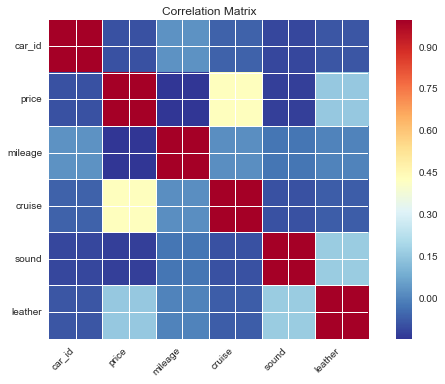

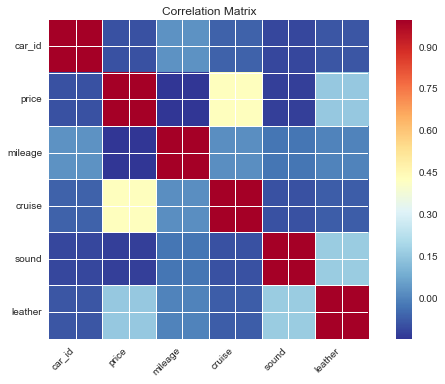

In [30]:
numerics_only = car_price.select_dtypes(['int64', 'float64'])
sm.graphics.plot_corr(numerics_only.corr(), xnames=numerics_only.columns.tolist())

In [31]:
numerics_only.corr()

,car_id,price,mileage,cruise,sound,leather
car_id,1.000000,-0.089778,0.035162,-0.060988,-0.109941,-0.081113
price,-0.089778,1.000000,-0.143051,0.430851,-0.124348,0.157197
mileage,0.035162,-0.143051,1.000000,0.025037,-0.026146,0.001005
cruise,-0.060988,0.430851,0.025037,1.000000,-0.091730,-0.070573
sound,-0.109941,-0.124348,-0.026146,-0.091730,1.000000,0.165444
leather,-0.081113,0.157197,0.001005,-0.070573,0.165444,1.000000


We don't think any of the predictor variables are highly correlated. We will include all of them in the model (except car_id).

#### 2
2) Fit a multiple regression model with all the available features to predict price. Check all the assumptions made about the model as you have done previously. Comment on the Q-Q plot and the residual plot.

   

In [32]:
X = car_price[['mileage', 'cruise', 'sound', 'leather']]
X = sm.add_constant(X)
y = car_price['price']

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     69.96
Date:                Fri, 07 Oct 2016   Prob (F-statistic):           8.28e-51
Time:                        16:52:02   Log-Likelihood:                -8415.4
No. Observations:                 804   AIC:                         1.684e+04
Df Residuals:                     799   BIC:                         1.686e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.599e+04   1154.537     13.848      0.000      1.37e+04  1.83e+04
mileage       -0.1899      0.037     -5.168      0.000        -0.262    -0.118
cruise      1.003e+04    701.153     14.307      0.000      8655.419  1.14e+04
sound      -2598.1081    655.647     -3.963      0.000     -3885.102 -1311.115
leather     4609.1882    683.226      6.746      0.000      3268.058  5950.318
==============================================================================
Omnibus:                      230.048   Durbin-Watson:                   0.497
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              798.998
Skew:                           1.343   Prob(JB):                    3.16e-174
Kurtosis:                       7.079   Cond. No.                     9.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

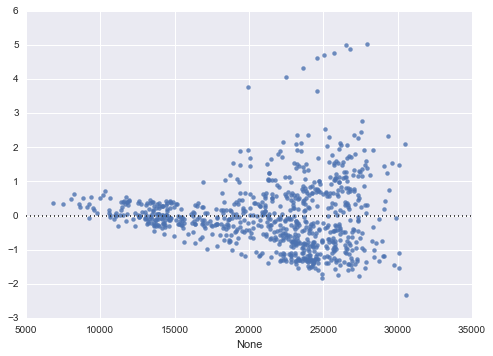

In [33]:
sns.residplot(results.fittedvalues, results.resid_pearson, car_price);

The residual plot shows no linearity.

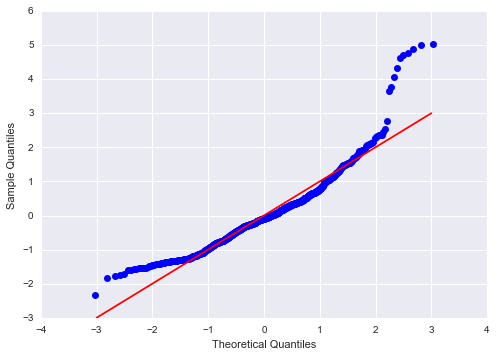

In [34]:
sres1 = results.resid_pearson
qqplot(sres1)
q = linspace(-3, 3)
plot(q, q, color='r');

The QQ plot shows non Normality.

#### 3

3) One of the remedies to heteroskedastic residuals is to take the log of the response. Log the response and re-run the model and check the assumptions again.

   

In [35]:
log_y = np.log(y)

model_log = sm.OLS(log_y, X)
results_log = model_log.fit()
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     90.95
Date:                Fri, 07 Oct 2016   Prob (F-statistic):           1.00e-63
Time:                        16:52:02   Log-Likelihood:                -272.86
No. Observations:                 804   AIC:                             555.7
Df Residuals:                     799   BIC:                             579.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          9.6380      0.046    208.888      0.000         9.547     9.729
mileage    -8.209e-06   1.47e-06     -5.591      0.000     -1.11e-05 -5.33e-06
cruise         0.4740      0.028     16.916      0.000         0.419     0.529
sound         -0.1129      0.026     -4.311      0.000        -0.164    -0.062
leather        0.1712      0.027      6.270      0.000         0.118     0.225
==============================================================================
Omnibus:                        2.332   Durbin-Watson:                   0.586
Prob(Omnibus):                  0.312   Jarque-Bera (JB):                2.203
Skew:                           0.124   Prob(JB):                        0.332
Kurtosis:                       3.067   Cond. No.                     9.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

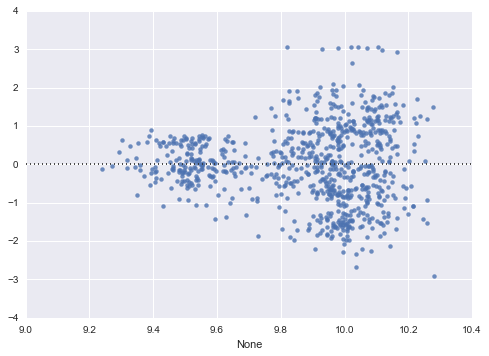

In [36]:
sns.residplot(results_log.fittedvalues, results_log.resid_pearson, car_price);

We can see improved linearity, although there's heteroskedastic.

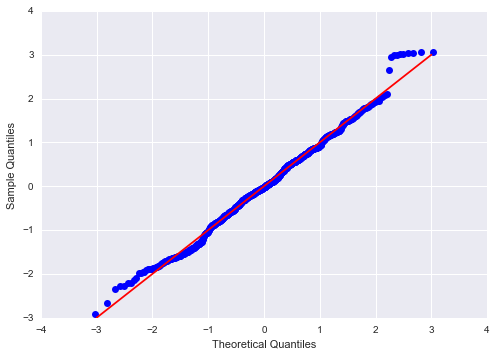

In [37]:
sres1 = results_log.resid_pearson
qqplot(sres1)
q = linspace(-3, 3)
plot(q, q, color='r');

Visually, we observe Normality.

#### 4
4) As a rule of thumb, the fewer variables there are in a model, the easier it is to interpret the model. Use your judgement and remove features which you think are of little practical importance and have coefficients that are statistically insignificant.

   

In [38]:
# We consider sound and leather impractical, so we remove them from the model.
# We remove first sound, as the most impractical.
X_no_sound = car_price[['mileage', 'cruise', 'leather']]
X_no_sound = sm.add_constant(X_no_sound)
y_no_sound = car_price['price']

model_no_sound = sm.OLS(y_no_sound, X_no_sound)
results_no_sound = model_no_sound.fit()
results_no_sound.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     86.46
Date:                Fri, 07 Oct 2016   Prob (F-statistic):           1.84e-48
Time:                        16:52:03   Log-Likelihood:                -8423.2
No. Observations:                 804   AIC:                         1.685e+04
Df Residuals:                     800   BIC:                         1.687e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        1.43e+04   1082.620     13.206      0.000      1.22e+04  1.64e+04
mileage       -0.1863      0.037     -5.026      0.000        -0.259    -0.114
cruise      1.026e+04    705.255     14.542      0.000      8871.751  1.16e+04
leather     4175.5846    680.576      6.135      0.000      2839.659  5511.510
==============================================================================
Omnibus:                      211.175   Durbin-Watson:                   0.454
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              653.524
Skew:                           1.271   Prob(JB):                    1.23e-142
Kurtosis:                       6.612   Cond. No.                     8.56e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model is not great. We will add back sound and remove leather to check if there's improvement:

In [39]:
X_no_leather = car_price[['mileage', 'cruise', 'sound']]
X_no_leather = sm.add_constant(X_no_leather)
y_no_leather = car_price['price']

model_no_leather = sm.OLS(y_no_leather, X_no_leather)
results_no_leather = model_no_leather.fit()
results_no_leather.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     74.00
Date:                Fri, 07 Oct 2016   Prob (F-statistic):           3.03e-42
Time:                        16:52:03   Log-Likelihood:                -8437.7
No. Observations:                 804   AIC:                         1.688e+04
Df Residuals:                     800   BIC:                         1.690e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.901e+04   1093.182     17.391      0.000      1.69e+04  2.12e+04
mileage       -0.1882      0.038     -4.986      0.000        -0.262    -0.114
cruise      9764.2626    719.242     13.576      0.000      8352.439  1.12e+04
sound      -1889.7202    664.944     -2.842      0.005     -3194.962  -584.479
==============================================================================
Omnibus:                      253.148   Durbin-Watson:                   0.385
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              879.700
Skew:                           1.487   Prob(JB):                    9.45e-192
Kurtosis:                       7.173   Cond. No.                     8.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

No improvement either. We will remove both leather and sound.

In [40]:
X_no_leather_no_sound = car_price[['mileage', 'cruise']]
X_no_leather_no_sound = sm.add_constant(X_no_leather_no_sound)
y_no_leather_no_sound = car_price['price']

model_no_leather_no_sound = sm.OLS(y_no_sound, X_no_sound)
results_no_leather_no_sound = model_no_leather_no_sound.fit()
results_no_leather_no_sound.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     86.46
Date:                Fri, 07 Oct 2016   Prob (F-statistic):           1.84e-48
Time:                        16:52:03   Log-Likelihood:                -8423.2
No. Observations:                 804   AIC:                         1.685e+04
Df Residuals:                     800   BIC:                         1.687e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        1.43e+04   1082.620     13.206      0.000      1.22e+04  1.64e+04
mileage       -0.1863      0.037     -5.026      0.000        -0.259    -0.114
cruise      1.026e+04    705.255     14.542      0.000      8871.751  1.16e+04
leather     4175.5846    680.576      6.135      0.000      2839.659  5511.510
==============================================================================
Omnibus:                      211.175   Durbin-Watson:                   0.454
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              653.524
Skew:                           1.271   Prob(JB):                    1.23e-142
Kurtosis:                       6.612   Cond. No.                     8.56e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 5
5) (Extra Credit) Run outlier diagnostics in order to identify and explain outliers of the model.

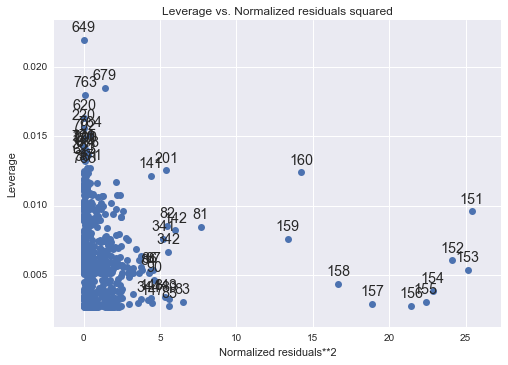

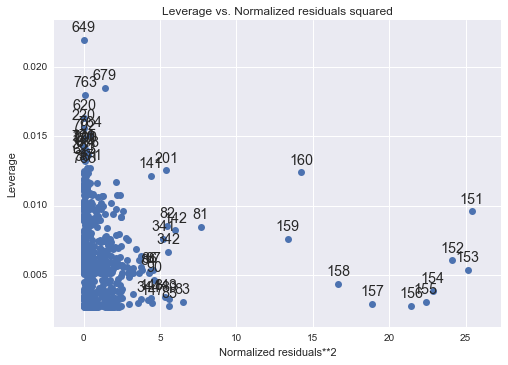

In [41]:
plot_leverage_resid2(results)

There's a lot of outliers.